FileNotFoundError: [Errno 2] No such file or directory: 'Line a'

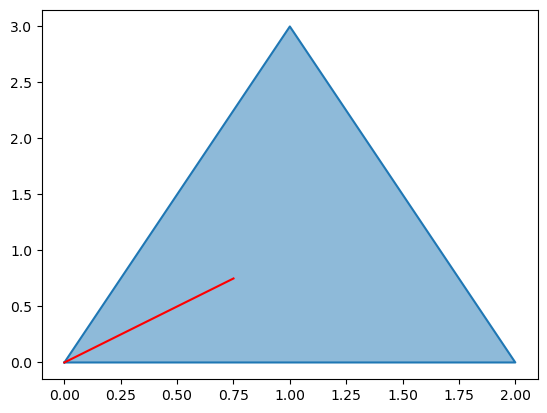

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# Create a dataframe with coordinates of the triangle vertices
data = {'X': [0, 1, 2, 0], 'Y': [0, 3, 0, 0]}  # Include the first vertex to close the triangle
df = pd.DataFrame(data)

# Plot the triangle
plt.plot(df['X'], df['Y'])
plt.fill(df['X'], df['Y'], alpha=0.5)  # Fill the triangle with color

# Calculate the center of the triangle
center_x = df['X'].mean()
center_y = df['Y'].mean()

# Store the coordinates where the lines touch the triangle's edges
line_coords = []

# Plot the lines and store the touch points
for i in range(3):
    line_x = [df['X'][i], center_x]
    line_y = [df['Y'][i], center_y]
    plt.plot(line_x, line_y, color='red')

    touch_point = (line_x[1], line_y[1])
    line_coords.append(touch_point)

    # Label the lines
    label = f'Line {chr(97+i)}'
    ab = AnnotationBbox(OffsetImage(plt.imread(label), zoom=0.05), (line_x[1], line_y[1]), frameon=False)
    plt.gca().add_artist(ab)

# Plot the center point
plt.plot(center_x, center_y, 'ko', label='Center')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Triangle with Center Lines')
plt.legend()
plt.show()

# Print the touch points
print("Coordinates where the lines touch the triangle's edges:")
for i, coord in enumerate(line_coords):
    print(f"Line {chr(97+i)}: {coord}")


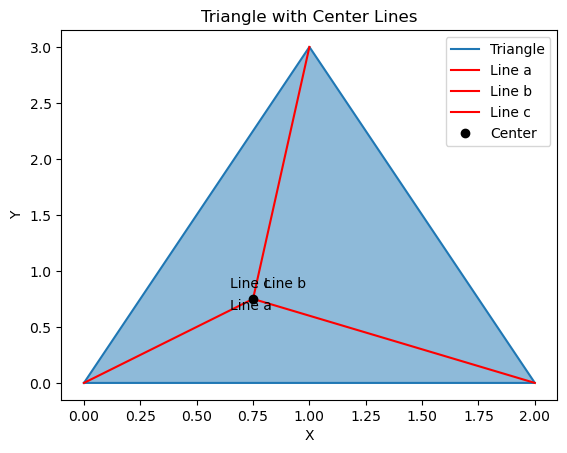

Coordinates where the lines touch the triangle's edges:
Line a: (0.75, 0.75)
Line b: (0.75, 0.75)
Line c: (0.75, 0.75)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Create a dataframe with coordinates of the triangle vertices
data = {'X': [0, 1, 2, 0], 'Y': [0, 3, 0, 0]}  # Include the first vertex to close the triangle
df = pd.DataFrame(data)

fig, ax = plt.subplots()

# Plot the triangle
ax.plot(df['X'], df['Y'], label="Triangle")
ax.fill(df['X'], df['Y'], alpha=0.5)  # Fill the triangle with color

# Calculate the center of the triangle
center_x = df['X'].mean()
center_y = df['Y'].mean()

# Store the coordinates where the lines touch the triangle's edges
line_coords = []

# Define offsets for label placement to avoid overlap
offsets = np.array([[-0.1, -0.1], [0.05, 0.1], [-0.1, 0.1]])

# Plot the lines and store the touch points
for i in range(3):
    line_x = [df['X'][i], center_x]
    line_y = [df['Y'][i], center_y]
    ax.plot(line_x, line_y, color='red', label=f'Line {chr(97+i)}')

    touch_point = (line_x[1], line_y[1])
    line_coords.append(touch_point)

    # Label the lines with offset to avoid overlap
    ax.text(line_x[1]+offsets[i, 0], line_y[1]+offsets[i, 1], f'Line {chr(97+i)}')

# Plot the center point
ax.plot(center_x, center_y, 'ko', label='Center')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Triangle with Center Lines')
ax.legend()
plt.show()

# Print the touch points
print("Coordinates where the lines touch the triangle's edges:")
for i, coord in enumerate(line_coords):
    print(f"Line {chr(97+i)}: {coord}")



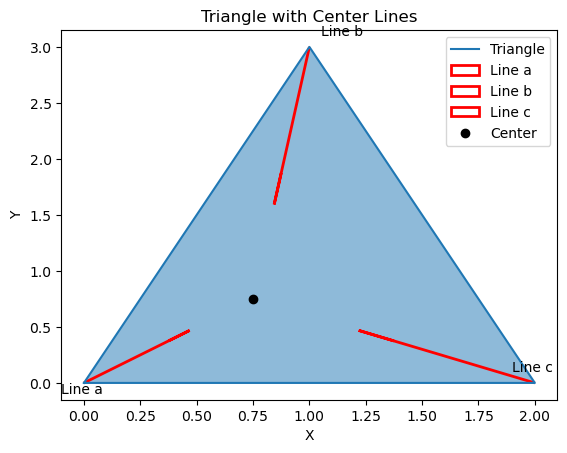

Coordinates where the lines touch the triangle's edges:
Line a: (0, 0)
Line b: (1, 3)
Line c: (2, 0)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

# Create a dataframe with coordinates of the triangle vertices
data = {'X': [0, 1, 2, 0], 'Y': [0, 3, 0, 0]}  # Include the first vertex to close the triangle
df = pd.DataFrame(data)

fig, ax = plt.subplots()

# Plot the triangle
ax.plot(df['X'], df['Y'], label="Triangle")
ax.fill(df['X'], df['Y'], alpha=0.5)  # Fill the triangle with color

# Calculate the center of the triangle
center_x = df['X'].mean()
center_y = df['Y'].mean()

# Store the coordinates where the lines touch the triangle's edges
line_coords = []

# Define offsets for label placement to avoid overlap
offsets = np.array([[-0.1, -0.1], [0.05, 0.1], [-0.1, 0.1]])

# Create the curved lines
for i in range(3):
    # Create a path for the Bezier curve
    verts = [(df['X'][i], df['Y'][i]), (center_x, center_y), ((df['X'][i] + center_x)/2, (df['Y'][i] + center_y)/2)]
    codes = [patches.Path.MOVETO, patches.Path.CURVE3, patches.Path.CURVE3]
    path = patches.Path(verts, codes)

    # Create a patch and add it to the plot
    patch = patches.PathPatch(path, facecolor='none', lw=2, edgecolor='red', label=f'Line {chr(97+i)}')
    ax.add_patch(patch)

    touch_point = (df['X'][i], df['Y'][i])
    line_coords.append(touch_point)

    # Label the lines with offset to avoid overlap
    ax.text(df['X'][i]+offsets[i, 0], df['Y'][i]+offsets[i, 1], f'Line {chr(97+i)}')

# Plot the center point
ax.plot(center_x, center_y, 'ko', label='Center')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Triangle with Center Lines')
ax.legend()
plt.show()

# Print the touch points
print("Coordinates where the lines touch the triangle's edges:")
for i, coord in enumerate(line_coords):
    print(f"Line {chr(97+i)}: {coord}")


Nice attempt

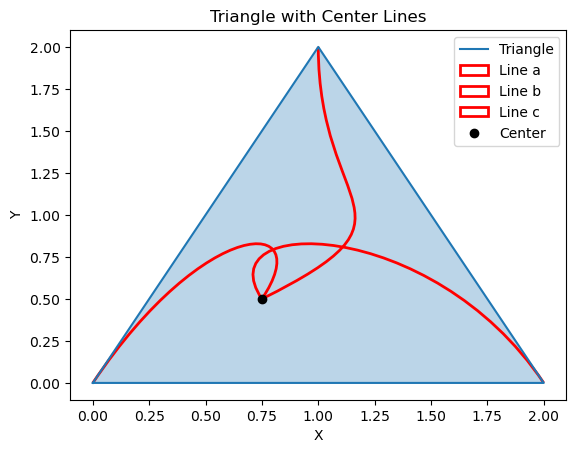

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

# Create a dataframe with coordinates of the triangle vertices
data = {'X': [0, 1, 2, 0], 'Y': [0, 2, 0, 0]}  # Include the first vertex to close the triangle
df = pd.DataFrame(data)

fig, ax = plt.subplots()

# Plot the triangle
ax.plot(df['X'], df['Y'], label="Triangle")
ax.fill(df['X'], df['Y'], alpha=0.3)  # Fill the triangle with color

# Calculate the center of the triangle
center_x = df['X'].mean()
center_y = df['Y'].mean()

# Control points for the Bezier curves, adjust these as needed
control_points = [(0.5, 1), (1, 1), (1.5, 1)]

for i in range(3):
    # Define a cubic Bezier curve using the triangle vertex, center, and a control point
    verts = [(df['X'][i], df['Y'][i]), control_points[i], control_points[(i+1)%3], (center_x, center_y)]
    codes = [patches.Path.MOVETO, patches.Path.CURVE4, patches.Path.CURVE4, patches.Path.CURVE4]
    path = patches.Path(verts, codes)

    patch = patches.PathPatch(path, facecolor='none', lw=2, edgecolor='red', label=f'Line {chr(97+i)}')
    ax.add_patch(patch)

# Plot the center point
ax.plot(center_x, center_y, 'ko', label='Center')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Triangle with Center Lines')
ax.legend()
plt.show()


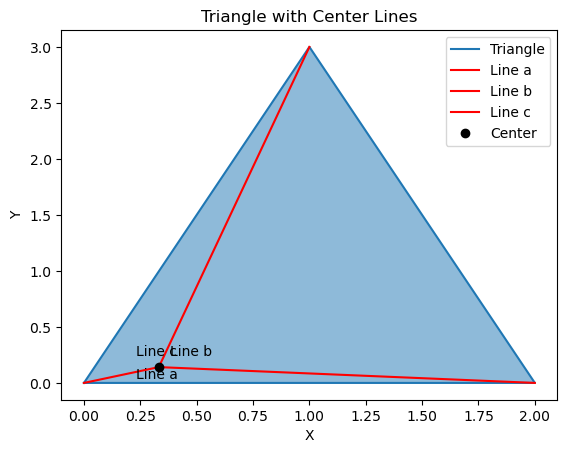

Coordinates where the lines touch the triangle's edges:
Line a: (0.3319716229593299, 0.14120970295322866)
Line b: (0.3319716229593299, 0.14120970295322866)
Line c: (0.3319716229593299, 0.14120970295322866)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Create a dataframe with coordinates of the triangle vertices
data = {'X': [0, 1, 2, 0], 'Y': [0, 3, 0, 0]}  # Include the first vertex to close the triangle
df = pd.DataFrame(data)

fig, ax = plt.subplots()

# Plot the triangle
ax.plot(df['X'], df['Y'], label="Triangle")
ax.fill(df['X'], df['Y'], alpha=0.5)  # Fill the triangle with color

# Generate a random point within the triangle
random_point = [np.random.uniform(0, 2), np.random.uniform(0, 3)]
center_x, center_y = random_point

# Store the coordinates where the lines touch the triangle's edges
line_coords = []

# Define offsets for label placement to avoid overlap
offsets = np.array([[-0.1, -0.1], [0.05, 0.1], [-0.1, 0.1]])

# Plot the lines and store the touch points
for i in range(3):
    line_x = [df['X'][i], center_x]
    line_y = [df['Y'][i], center_y]
    ax.plot(line_x, line_y, color='red', label=f'Line {chr(97+i)}')

    touch_point = (line_x[1], line_y[1])
    line_coords.append(touch_point)

    # Label the lines with offset to avoid overlap
    ax.text(line_x[1]+offsets[i, 0], line_y[1]+offsets[i, 1], f'Line {chr(97+i)}')

# Plot the center point
ax.plot(center_x, center_y, 'ko', label='Center')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Triangle with Center Lines')
ax.legend()
plt.show()

# Print the touch points
print("Coordinates where the lines touch the triangle's edges:")
for i, coord in enumerate(line_coords):
    print(f"Line {chr(97+i)}: {coord}")


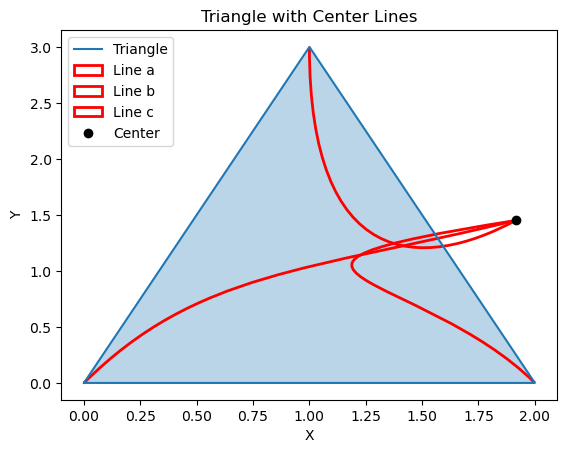

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

# Create a dataframe with coordinates of the triangle vertices
data = {'X': [0, 1, 2, 0], 'Y': [0, 3, 0, 0]}  # Include the first vertex to close the triangle
df = pd.DataFrame(data)

fig, ax = plt.subplots()

# Plot the triangle
ax.plot(df['X'], df['Y'], label="Triangle")
ax.fill(df['X'], df['Y'], alpha=0.3)  # Fill the triangle with color

# Generate a random point within the triangle
random_point = [np.random.uniform(0, 2), np.random.uniform(0, 3)]
center_x, center_y = random_point

# Control points for the Bezier curves, adjust these as needed
control_points = [(0.5, 1), (1, 1), (1.5, 1)]

for i in range(3):
    # Define a cubic Bezier curve using the triangle vertex, center, and a control point
    verts = [(df['X'][i], df['Y'][i]), control_points[i], control_points[(i+1)%3], (center_x, center_y)]
    codes = [patches.Path.MOVETO, patches.Path.CURVE4, patches.Path.CURVE4, patches.Path.CURVE4]
    path = patches.Path(verts, codes)

    patch = patches.PathPatch(path, facecolor='none', lw=2, edgecolor='red', label=f'Line {chr(97+i)}')
    ax.add_patch(patch)

# Plot the center point
ax.plot(center_x, center_y, 'ko', label='Center')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Triangle with Center Lines')
ax.legend()
plt.show()


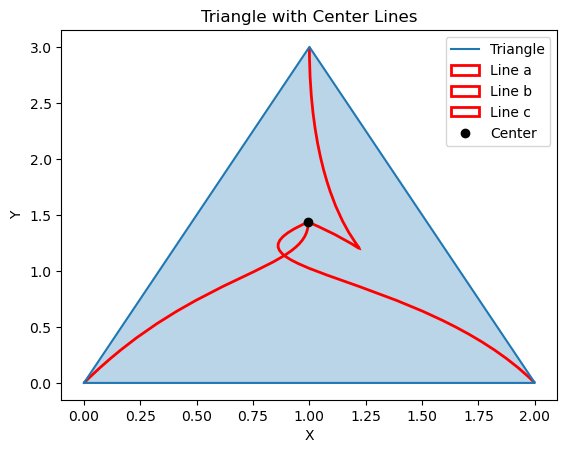

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

# Create a dataframe with coordinates of the triangle vertices
data = {'X': [0, 1, 2, 0], 'Y': [0, 3, 0, 0]}  # Include the first vertex to close the triangle
df = pd.DataFrame(data)

fig, ax = plt.subplots()

# Plot the triangle
ax.plot(df['X'], df['Y'], label="Triangle")
ax.fill(df['X'], df['Y'], alpha=0.3)  # Fill the triangle with color

# Barycentric coordinates for the random point
weights = np.random.uniform(size=3)
weights /= weights.sum()

# Generate a random point within the triangle
random_point = [weights[0]*df['X'][0] + weights[1]*df['X'][1] + weights[2]*df['X'][2], 
                weights[0]*df['Y'][0] + weights[1]*df['Y'][1] + weights[2]*df['Y'][2]]
center_x, center_y = random_point

# Control points for the Bezier curves, adjust these as needed
control_points = [(0.5, 1), (1, 1), (1.5, 1)]

for i in range(3):
    # Define a cubic Bezier curve using the triangle vertex, center, and a control point
    verts = [(df['X'][i], df['Y'][i]), control_points[i], control_points[(i+1)%3], (center_x, center_y)]
    codes = [patches.Path.MOVETO, patches.Path.CURVE4, patches.Path.CURVE4, patches.Path.CURVE4]
    path = patches.Path(verts, codes)

    patch = patches.PathPatch(path, facecolor='none', lw=2, edgecolor='red', label=f'Line {chr(97+i)}')
    ax.add_patch(patch)

# Plot the center point
ax.plot(center_x, center_y, 'ko', label='Center')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Triangle with Center Lines')
ax.legend()
plt.show()


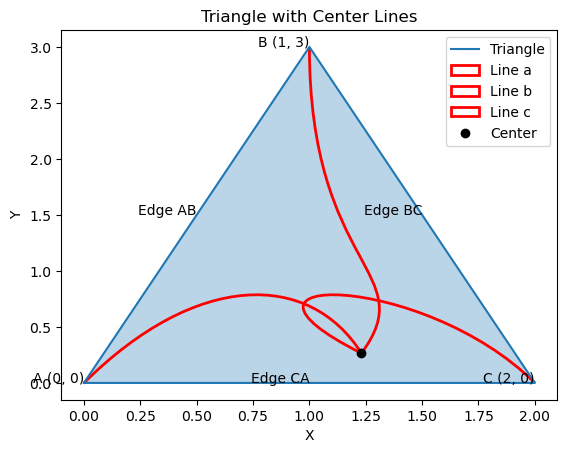

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

# Create a dataframe with coordinates of the triangle vertices
data = {'X': [0, 1, 2, 0], 'Y': [0, 3, 0, 0]}  # Include the first vertex to close the triangle
df = pd.DataFrame(data)

fig, ax = plt.subplots()

# Plot the triangle
ax.plot(df['X'], df['Y'], label="Triangle")
ax.fill(df['X'], df['Y'], alpha=0.3)  # Fill the triangle with color

# Barycentric coordinates for the random point
weights = np.random.uniform(size=3)
weights /= weights.sum()

# Generate a random point within the triangle
random_point = [weights[0]*df['X'][0] + weights[1]*df['X'][1] + weights[2]*df['X'][2], 
                weights[0]*df['Y'][0] + weights[1]*df['Y'][1] + weights[2]*df['Y'][2]]
center_x, center_y = random_point

# Control points for the Bezier curves, adjust these as needed
control_points = [(0.5, 1), (1, 1), (1.5, 1)]

# Add labels for corners (vertices)
vertices = ['A', 'B', 'C']
for i in range(3):
    ax.text(df['X'][i], df['Y'][i], f'{vertices[i]} ({df["X"][i]}, {df["Y"][i]})', fontsize=10, ha='right')

# Add labels for edges (sides)
edges = ['AB', 'BC', 'CA']
for i in range(3):
    mid_x = (df['X'][i] + df['X'][(i+1)%3]) / 2
    mid_y = (df['Y'][i] + df['Y'][(i+1)%3]) / 2
    ax.text(mid_x, mid_y, f'Edge {edges[i]}', fontsize=10, ha='right')

for i in range(3):
    # Define a cubic Bezier curve using the triangle vertex, center, and a control point
    verts = [(df['X'][i], df['Y'][i]), control_points[i], control_points[(i+1)%3], (center_x, center_y)]
    codes = [patches.Path.MOVETO, patches.Path.CURVE4, patches.Path.CURVE4, patches.Path.CURVE4]
    path = patches.Path(verts, codes)

    patch = patches.PathPatch(path, facecolor='none', lw=2, edgecolor='red', label=f'Line {chr(97+i)}')
    ax.add_patch(patch)

# Plot the center point
ax.plot(center_x, center_y, 'ko', label='Center')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Triangle with Center Lines')
ax.legend()
plt.show()


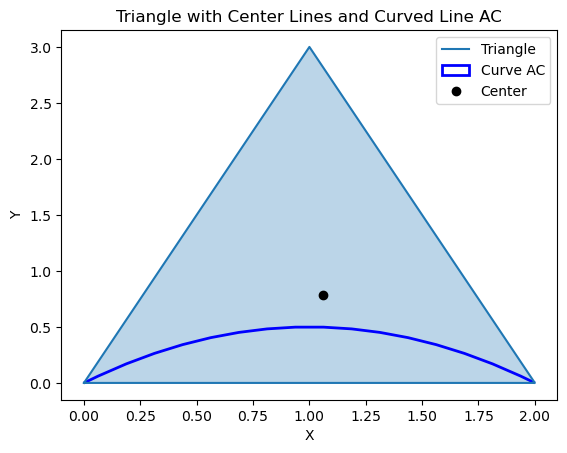

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

# Create a dataframe with coordinates of the triangle vertices
data = {'X': [0, 1, 2, 0], 'Y': [0, 3, 0, 0]}  # Include the first vertex to close the triangle
df = pd.DataFrame(data)

fig, ax = plt.subplots()

# Plot the triangle
ax.plot(df['X'], df['Y'], label="Triangle")
ax.fill(df['X'], df['Y'], alpha=0.3)  # Fill the triangle with color

# Barycentric coordinates for the random point
weights = np.random.uniform(size=3)
weights /= weights.sum()

# Generate a random point within the triangle
random_point = [weights[0]*df['X'][0] + weights[1]*df['X'][1] + weights[2]*df['X'][2], 
                weights[0]*df['Y'][0] + weights[1]*df['Y'][1] + weights[2]*df['Y'][2]]
center_x, center_y = random_point

# Control points for the Bezier curve from A to C, adjust as needed
control_point = (1, 1)

# Define a quadratic Bezier curve using points A, control point, and C
verts = [(df['X'][0], df['Y'][0]), control_point, (df['X'][2], df['Y'][2])]
codes = [patches.Path.MOVETO, patches.Path.CURVE3, patches.Path.CURVE3]
path = patches.Path(verts, codes)

patch = patches.PathPatch(path, facecolor='none', lw=2, edgecolor='blue', label='Curve AC')
ax.add_patch(patch)

# Plot the center point
ax.plot(center_x, center_y, 'ko', label='Center')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Triangle with Center Lines and Curved Line AC')
ax.legend()
plt.show()


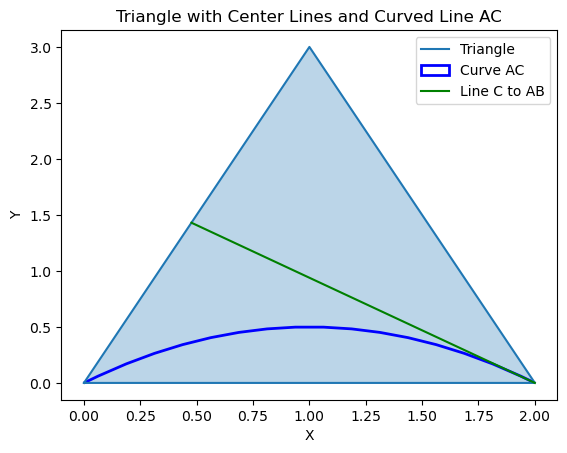

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

# Create a dataframe with coordinates of the triangle vertices
data = {'X': [0, 1, 2, 0], 'Y': [0, 3, 0, 0]}  # Include the first vertex to close the triangle
df = pd.DataFrame(data)

fig, ax = plt.subplots()

# Plot the triangle
ax.plot(df['X'], df['Y'], label="Triangle")
ax.fill(df['X'], df['Y'], alpha=0.3)  # Fill the triangle with color

# Control points for the Bezier curve from A to C, adjust as needed
control_point = (1, 1)

# Define a quadratic Bezier curve using points A, control point, and C
verts = [(df['X'][0], df['Y'][0]), control_point, (df['X'][2], df['Y'][2])]
codes = [patches.Path.MOVETO, patches.Path.CURVE3, patches.Path.CURVE3]
path = patches.Path(verts, codes)

patch = patches.PathPatch(path, facecolor='none', lw=2, edgecolor='blue', label='Curve AC')
ax.add_patch(patch)

# Generate a random point on edge AB
random_weight = np.random.uniform()
random_point_AB = [random_weight*df['X'][0] + (1-random_weight)*df['X'][1], 
                   random_weight*df['Y'][0] + (1-random_weight)*df['Y'][1]]

# Add a line from point C to the random point on edge AB
ax.plot([df['X'][2], random_point_AB[0]], [df['Y'][2], random_point_AB[1]], color='green', label='Line C to AB')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Triangle with Center Lines and Curved Line AC')
ax.legend()
plt.show()


# Trenary plot

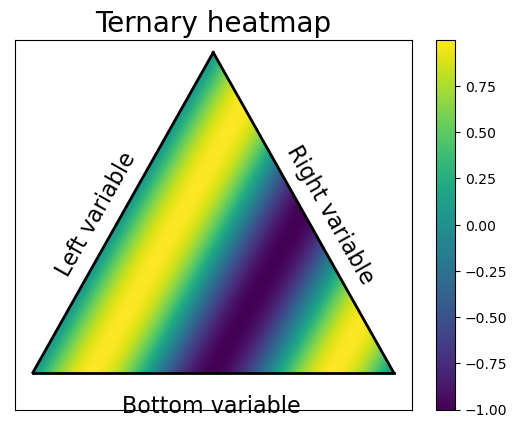

In [4]:
import ternary
import numpy as np
import matplotlib.pyplot as plt

# Define a function for the color intensity based on the position.
def color_function(coords):
    x, y, z = coords
    return np.sin(3 * np.pi * x)

# Create a new ternary figure.
figure, tax = ternary.figure(scale=100)

# Draw the heatmap.
tax.heatmapf(color_function, boundary=True, style="triangular")

# Set the labels and title.
tax.boundary(linewidth=2.0)
tax.left_axis_label("Left variable", fontsize=16)
tax.right_axis_label("Right variable", fontsize=16)
tax.bottom_axis_label("Bottom variable", fontsize=16)
tax.set_title("Ternary heatmap", fontsize=20)

# Remove the default Matplotlib axes.
tax.clear_matplotlib_ticks()

# Show the plot.
ternary.plt.show()


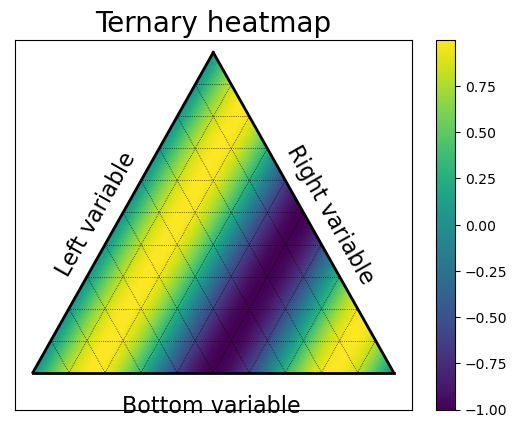

In [5]:
import ternary
import numpy as np
import matplotlib.pyplot as plt

# Define a function for the color intensity based on the position.
def color_function(coords):
    x, y, z = coords
    return np.sin(3 * np.pi * x)

# Create a new ternary figure.
figure, tax = ternary.figure(scale=100)

# Draw the heatmap.
tax.heatmapf(color_function, boundary=True, style="triangular")

# Set the labels and title.
tax.boundary(linewidth=2.0)
tax.left_axis_label("Left variable", fontsize=16)
tax.right_axis_label("Right variable", fontsize=16)
tax.bottom_axis_label("Bottom variable", fontsize=16)
tax.set_title("Ternary heatmap", fontsize=20)

# Add grid lines.
tax.gridlines(multiple=10, color="black")

# Remove the default Matplotlib axes.
tax.clear_matplotlib_ticks()

# Show the plot.
ternary.plt.show()


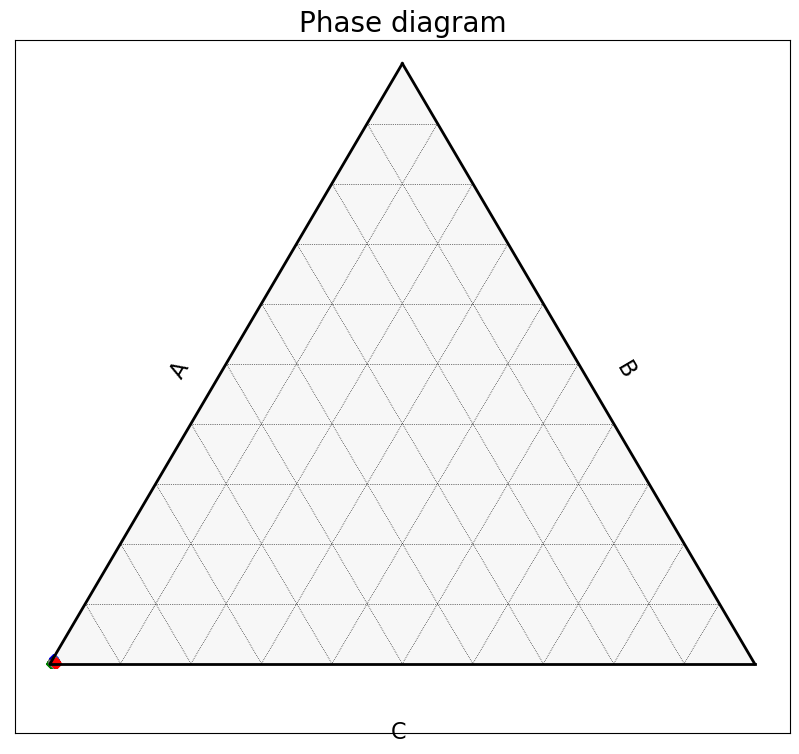

In [9]:
import ternary
import matplotlib.pyplot as plt

# Define a function for the color intensity based on the concentration.
def color_function(point):
    A, B, C = point
    if A > 0.6:
        return "red"  # Solid phase of A
    elif B > 0.7:
        return "blue"  # Solid phase of B
    elif C > 0.65:
        return "green"  # Solid phase of C
    else:
        return "gray"  # Liquid phase

# Create a new ternary figure.
figure, tax = ternary.figure(scale=100)
figure.set_size_inches(10, 9)

# Set the labels and title.
tax.boundary(linewidth=2.0)
tax.left_axis_label("A", fontsize=16)
tax.right_axis_label("B", fontsize=16)
tax.bottom_axis_label("C", fontsize=16)
tax.set_title("Phase diagram", fontsize=20)

# Add grid lines.
tax.gridlines(multiple=10, color="black")

# Remove the default Matplotlib axes.
tax.clear_matplotlib_ticks()

# Iterate over the ternary plot and color the points.
for i in range(101):
    for j in range(101 - i):
        k = 100 - i - j
        point = [i / 100, j / 100, k / 100]
        color = color_function(point)
        tax.scatter([point], marker='D', color=color, s=10)

# Show the plot.
ternary.plt.show()


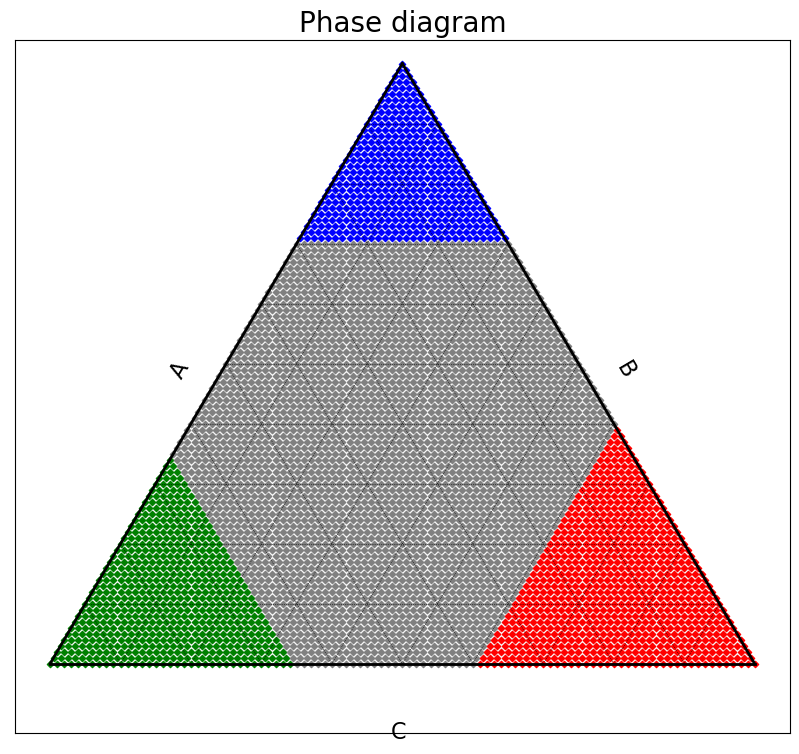

In [11]:
import ternary
import matplotlib.pyplot as plt

# Define a function for the color intensity based on the concentration.
def color_function(point):
    A, B, C = point
    if A > 0.6:
        return "red"  # Solid phase of A
    elif B > 0.7:
        return "blue"  # Solid phase of B
    elif C > 0.65:
        return "green"  # Solid phase of C
    else:
        return "gray"  # Liquid phase

# Create a new ternary figure.
figure, tax = ternary.figure(scale=100)
figure.set_size_inches(10, 9)

# Set the labels and title.
tax.boundary(linewidth=2.0)
tax.left_axis_label("A", fontsize=16)
tax.right_axis_label("B", fontsize=16)
tax.bottom_axis_label("C", fontsize=16)
tax.set_title("Phase diagram", fontsize=20)

# Add grid lines.
tax.gridlines(multiple=10, color="black")

# Remove the default Matplotlib axes.
tax.clear_matplotlib_ticks()

# Iterate over the ternary plot and color the points.
for i in range(101):
    for j in range(101 - i):
        k = 100 - i - j
        point = [i, j, k]  # Values are in the range of 0-100.
        color = color_function([v/100 for v in point])  # Normalize for color function.
        tax.scatter([point], marker='D', color=color, s=10)

# Show the plot.
ternary.plt.show()


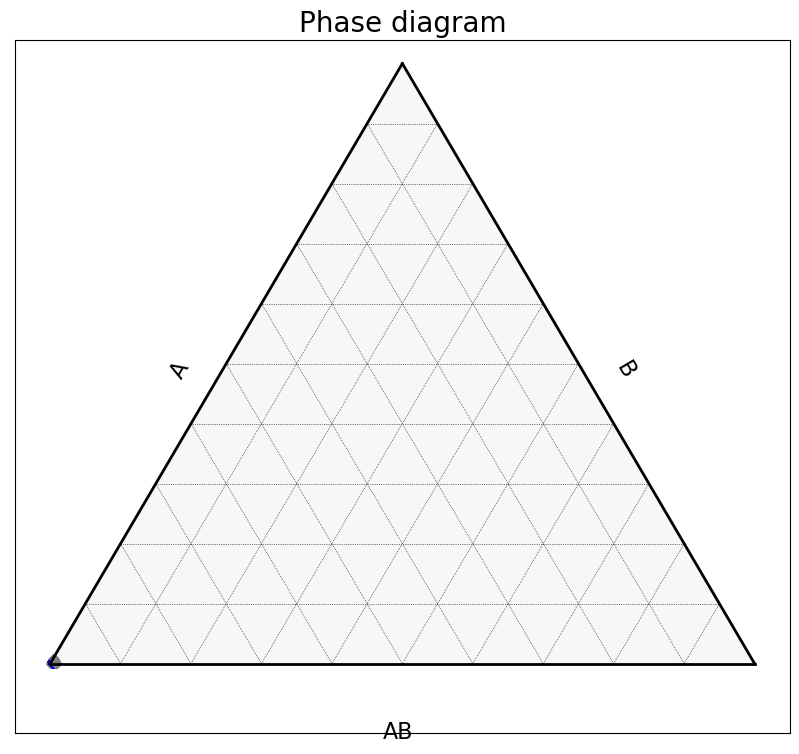

In [14]:
import ternary
import matplotlib.pyplot as plt

# Define a function for the phase based on the concentration.
def phase_function(point):
    A, B, AB = point
    if 0.3 <= AB <= 0.7:
        return "blue"  # Solid phase
    else:
        return "gray"  # Liquid phase

# Create a new ternary figure.
figure, tax = ternary.figure(scale=100)
figure.set_size_inches(10, 9)

# Set the labels and title.
tax.boundary(linewidth=2.0)
tax.left_axis_label("A", fontsize=16)
tax.right_axis_label("B", fontsize=16)
tax.bottom_axis_label("AB", fontsize=16)
tax.set_title("Phase diagram", fontsize=20)

# Add grid lines.
tax.gridlines(multiple=10, color="black")

# Remove the default Matplotlib axes.
tax.clear_matplotlib_ticks()

# Iterate over the ternary plot and color the points.
for i in range(101):
    for j in range(101):
        if i + j <= 100:
            k = 100 - i - j
            point = [i / 100, j / 100, k / 100]  # Values are normalized to 0-1.
            color = phase_function(point)
            tax.scatter([point], marker='D', color=color, s=10)

# Show the plot.
ternary.plt.show()


NameError: name 'product' is not defined

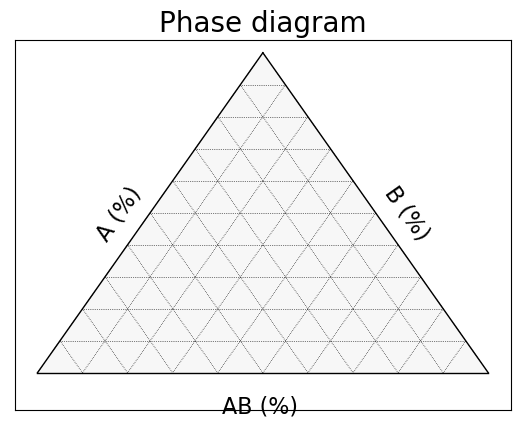

In [16]:
import ternary
import matplotlib.pyplot as plt
import numpy as np

# Create a new ternary figure.
scale = 100
figure, tax = ternary.figure(scale=scale)

# Define a function for the phase based on the concentration.
def phase_function(point):
    A, B, AB = point
    # Let's assume that the solid phase forms at 30% - 70% of AB
    if 30 <= AB <= 70:
        return "blue"  # Solid phase
    else:
        return "gray"  # Liquid phase

# Decorate the figure
tax.boundary(linewidth=1.0)
tax.gridlines(multiple=10, color="black")
tax.left_axis_label("A (%)", fontsize=16)
tax.right_axis_label("B (%)", fontsize=16)
tax.bottom_axis_label("AB (%)", fontsize=16)
tax.set_title("Phase diagram", fontsize=20)
tax.clear_matplotlib_ticks()

# Iterate over the ternary plot and color the points.
for i, j in product(range(scale+1), range(scale+1)):
    if i + j <= scale:
        k = scale - i - j
        point = [i, j, k]
        color = phase_function(point)
        tax.scatter([point], marker='D', color=color, s=10)

# Show the plot.
plt.show()


TypeError: 'float' object cannot be interpreted as an integer

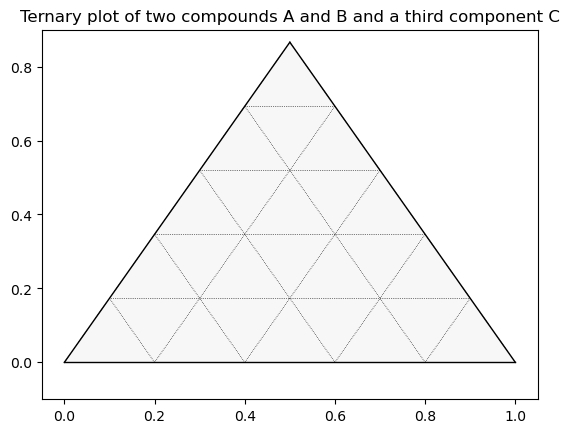

In [2]:
import ternary
import matplotlib.pyplot as plt

# Function to be plotted
def score_function(point):
    A, B, C = point
    if A > 0.6:
        return 1    # Phase 1
    elif B > 0.6:
        return 2    # Phase 2
    else:
        return 0    # No dominant phase

# Create a new ternary plot
figure, tax = ternary.figure(scale=1.0)

# Set labels for the three axes
tax.set_title("Ternary plot of two compounds A and B and a third component C")
tax.boundary(linewidth=1.0)
tax.gridlines(multiple=0.2, color="black")

# Plotting
tax.heatmapf(score_function, boundary=True, style="hexagonal", cmap=plt.cm.get_cmap('Greys'))

# Set axis labels
tax.left_axis_label("A", offset=0.14, fontsize=12, position=(-0.1,0.5,0,1))
tax.right_axis_label("B", offset=0.14, fontsize=12, position=(1.1,0.5,0,1))
tax.bottom_axis_label("C", offset=0.14, fontsize=12)

# Show the plot
ternary.plt.show()


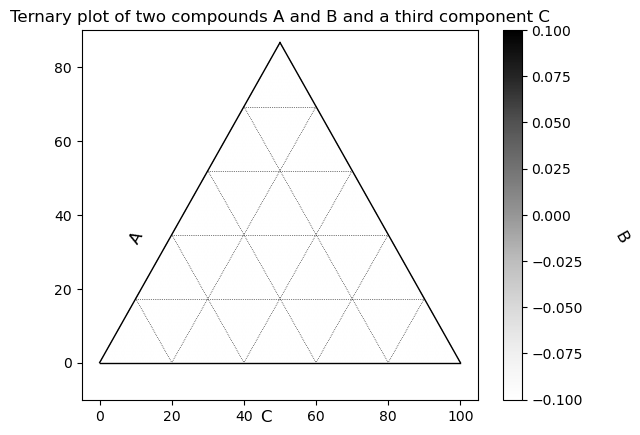

In [3]:
import ternary
import matplotlib.pyplot as plt

# Function to be plotted
def score_function(point):
    A, B, C = point
    A, B, C = A/100, B/100, C/100  # adjust the scale from 100 to 1
    if A > 0.6:
        return 1    # Phase 1
    elif B > 0.6:
        return 2    # Phase 2
    else:
        return 0    # No dominant phase

# Create a new ternary plot
figure, tax = ternary.figure(scale=100)

# Set labels for the three axes
tax.set_title("Ternary plot of two compounds A and B and a third component C")
tax.boundary(linewidth=1.0)
tax.gridlines(multiple=20, color="black")

# Plotting
tax.heatmapf(score_function, boundary=True, style="hexagonal", cmap=plt.cm.get_cmap('Greys'))

# Set axis labels
tax.left_axis_label("A", offset=0.14, fontsize=12, position=(-0.1,0.5,0,1))
tax.right_axis_label("B", offset=0.14, fontsize=12, position=(1.1,0.5,0,1))
tax.bottom_axis_label("C", offset=0.14, fontsize=12)

# Show the plot
ternary.plt.show()


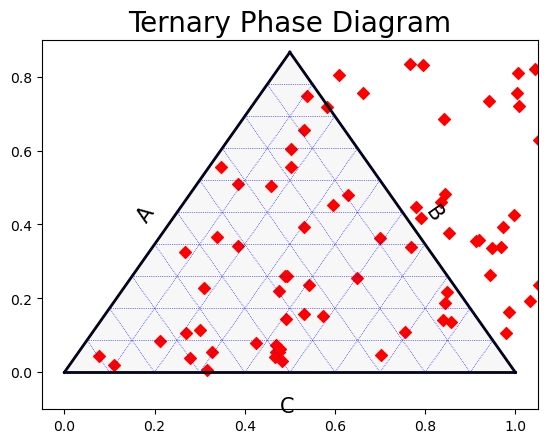

In [5]:
import ternary
import numpy as np

# Create a new figure
fig, tax = ternary.figure(scale=1.0)

# Set labels
tax.set_title("Ternary Phase Diagram", fontsize=20)
tax.boundary(linewidth=2.0)
tax.gridlines(multiple=0.1, color="blue")
tax.left_axis_label("A", fontsize=15)
tax.right_axis_label("B", fontsize=15)
tax.bottom_axis_label("C", fontsize=15)

# Generate data
A = np.random.rand(100)
B = np.random.rand(100)
C = 1.0 - (A + B)
points = list(zip(A,B,C))

# Scatter plot
tax.scatter(points, marker='D', color='red')

# Show plot
ternary.plt.show()


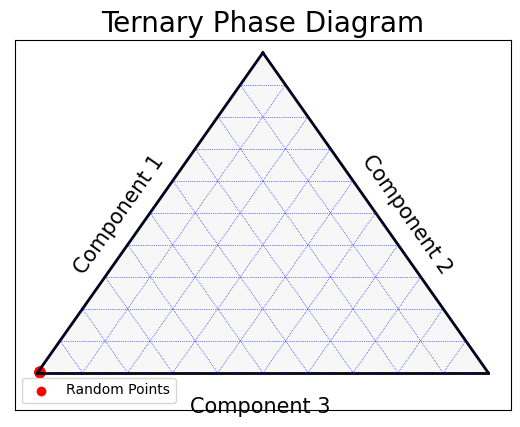

In [6]:
import ternary
import matplotlib.pyplot as plt
import numpy as np

# Define the size of the figure
figure, tax = ternary.figure(scale=100)
tax.boundary(linewidth=2.0)
tax.gridlines(multiple=10, color="blue")

# Set Labels
tax.set_title("Ternary Phase Diagram", fontsize=20)
tax.left_axis_label("Component 1", fontsize=15)
tax.right_axis_label("Component 2", fontsize=15)
tax.bottom_axis_label("Component 3", fontsize=15)

# Remove default Matplotlib Axes
tax.clear_matplotlib_ticks()

# Randomly generate points for demonstration
points = np.random.rand(20, 3) * 100
points /= points.sum(axis=1)[:, None]

# Plot points
tax.scatter(points, marker='o', color='red', label="Random Points")

tax.legend()
plt.show()


AttributeError: module 'ternary' has no attribute 'random_points'

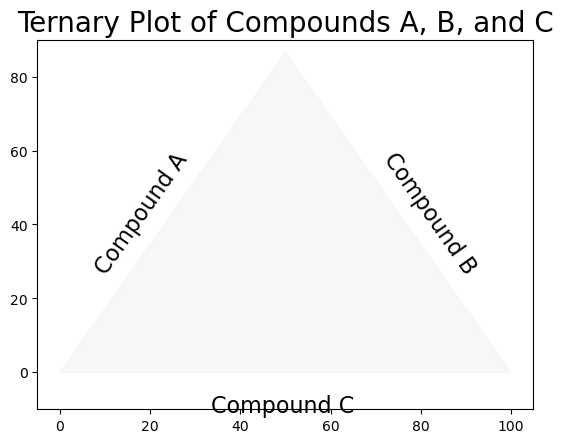

In [2]:
import ternary
import matplotlib.pyplot as plt

# Function to create the ternary plot
def create_ternary_plot():
    figure, tax = ternary.figure(scale=100)

    # Set the labels for the compounds
    tax.set_title("Ternary Plot of Compounds A, B, and C", fontsize=20)
    tax.left_axis_label("Compound A", fontsize=16)
    tax.right_axis_label("Compound B", fontsize=16)
    tax.bottom_axis_label("Compound C", fontsize=16)

    # Randomly generate data for the plot
    data = ternary.random_points(25, scale=100)

    # Plot the data
    tax.scatter(data, marker='D', color='red')

    # Show the plot
    ternary.plt.show()

# Call the function to create the plot
create_ternary_plot()


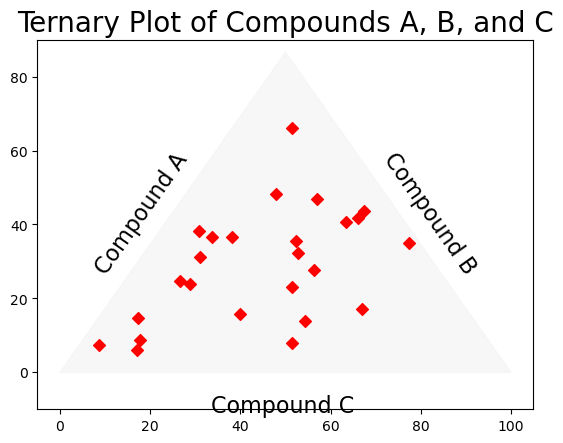

In [3]:
import ternary
import numpy as np
import matplotlib.pyplot as plt

# Function to create the ternary plot
def create_ternary_plot():
    figure, tax = ternary.figure(scale=100)

    # Set the labels for the compounds
    tax.set_title("Ternary Plot of Compounds A, B, and C", fontsize=20)
    tax.left_axis_label("Compound A", fontsize=16)
    tax.right_axis_label("Compound B", fontsize=16)
    tax.bottom_axis_label("Compound C", fontsize=16)

    # Randomly generate data for the plot
    data = []
    for i in range(25):
        x, y, z = np.random.rand(3)
        total = x + y + z
        data.append((x/total*100, y/total*100, z/total*100))

    # Plot the data
    tax.scatter(data, marker='D', color='red')

    # Show the plot
    plt.show()

# Call the function to create the plot
create_ternary_plot()


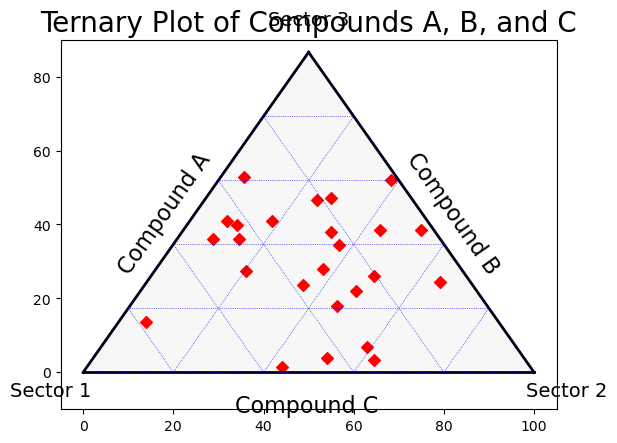

In [4]:
import ternary
import numpy as np
import matplotlib.pyplot as plt

# Function to create the ternary plot
def create_ternary_plot():
    figure, tax = ternary.figure(scale=100)

    # Set the labels for the compounds
    tax.set_title("Ternary Plot of Compounds A, B, and C", fontsize=20)
    tax.left_axis_label("Compound A", fontsize=16)
    tax.right_axis_label("Compound B", fontsize=16)
    tax.bottom_axis_label("Compound C", fontsize=16)

    # Randomly generate data for the plot
    data = []
    for i in range(25):
        x, y, z = np.random.rand(3)
        total = x + y + z
        data.append((x/total*100, y/total*100, z/total*100))

    # Plot the data
    tax.scatter(data, marker='D', color='red')

    # Draw boundary and gridlines
    tax.boundary(linewidth=2.0)
    tax.gridlines(color="blue", multiple=20)

    # Label the sectors
    tax.left_corner_label("Sector 1", fontsize=14)
    tax.right_corner_label("Sector 2", fontsize=14)
    tax.top_corner_label("Sector 3", fontsize=14)

    # Show the plot
    plt.show()

# Call the function to create the plot
create_ternary_plot()


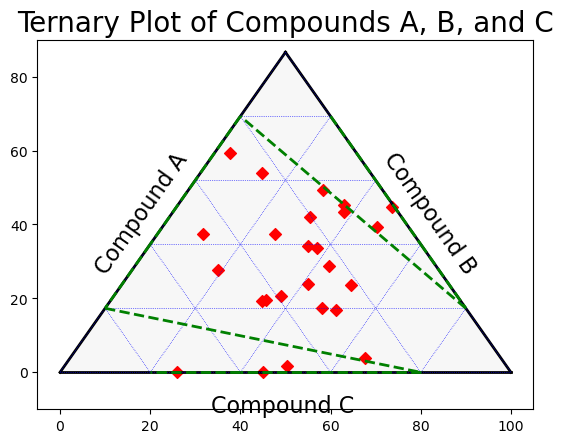

In [6]:
import ternary
import numpy as np
import matplotlib.pyplot as plt

# Function to create the ternary plot
def create_ternary_plot():
    figure, tax = ternary.figure(scale=100)

    # Set the labels for the compounds
    tax.set_title("Ternary Plot of Compounds A, B, and C", fontsize=20)
    tax.left_axis_label("Compound A", fontsize=16)
    tax.right_axis_label("Compound B", fontsize=16)
    tax.bottom_axis_label("Compound C", fontsize=16)

    # Randomly generate data for the plot
    data = []
    for i in range(25):
        x, y, z = np.random.rand(3)
        total = x + y + z
        data.append((x/total*100, y/total*100, z/total*100))

    # Plot the data
    tax.scatter(data, marker='D', color='red')

    # Draw boundary and gridlines
    tax.boundary(linewidth=2.0)
    tax.gridlines(color="blue", multiple=20)

    # Draw phase lines
    phase_lines = [(20, 80, 0), (40, 60, 0), (60, 40, 0), (80, 20, 0), 
                   (0, 80, 20), (0, 60, 40), (0, 40, 60), (0, 20, 80),
                   (80, 0, 20), (60, 0, 40), (40, 0, 60), (20, 0, 80)]
    for i in range(len(phase_lines) - 1):
        tax.line(phase_lines[i], phase_lines[i+1], linewidth=2.0, color='green', linestyle="--")

    # Show the plot
    plt.show()

# Call the function to create the plot
create_ternary_plot()


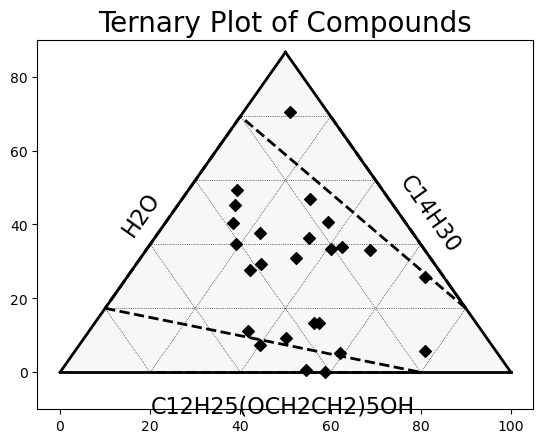

In [7]:
import ternary
import numpy as np
import matplotlib.pyplot as plt

# Function to create the ternary plot
def create_ternary_plot():
    figure, tax = ternary.figure(scale=100)

    # Set the labels for the compounds
    tax.set_title("Ternary Plot of Compounds", fontsize=20)
    tax.left_axis_label("H2O", fontsize=16)
    tax.right_axis_label("C14H30", fontsize=16)
    tax.bottom_axis_label("C12H25(OCH2CH2)5OH", fontsize=16)

    # Randomly generate data for the plot
    data = []
    for i in range(25):
        x, y, z = np.random.rand(3)
        total = x + y + z
        data.append((x/total*100, y/total*100, z/total*100))

    # Plot the data
    tax.scatter(data, marker='D', color='black')

    # Draw boundary and gridlines
    tax.boundary(linewidth=2.0)
    tax.gridlines(color="black", multiple=20)

    # Draw phase lines
    phase_lines = [(20, 80, 0), (40, 60, 0), (60, 40, 0), (80, 20, 0), 
                   (0, 80, 20), (0, 60, 40), (0, 40, 60), (0, 20, 80),
                   (80, 0, 20), (60, 0, 40), (40, 0, 60), (20, 0, 80)]
    for i in range(len(phase_lines) - 1):
        tax.line(phase_lines[i], phase_lines[i+1], linewidth=2.0, color='black', linestyle="--")

    # Show the plot
    plt.show()

# Call the function to create the plot
create_ternary_plot()


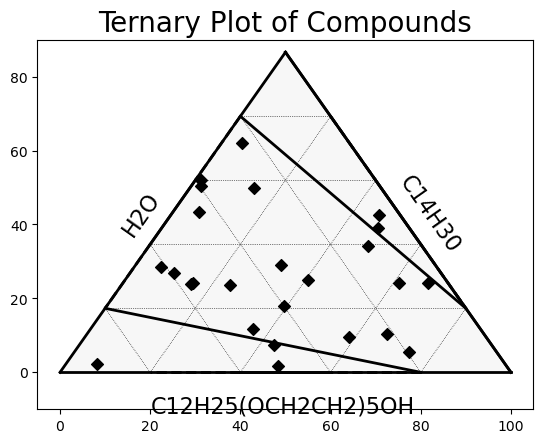

In [11]:
import ternary
import numpy as np
import matplotlib.pyplot as plt

# Function to create the ternary plot
def create_ternary_plot():
    figure, tax = ternary.figure(scale=100)

    # Set the labels for the compounds
    tax.set_title("Ternary Plot of Compounds", fontsize=20)
    tax.left_axis_label("H2O", fontsize=16)
    tax.right_axis_label("C14H30", fontsize=16)
    tax.bottom_axis_label("C12H25(OCH2CH2)5OH", fontsize=16)

    # Randomly generate data for the plot
    data = []
    for i in range(25):
        x, y, z = np.random.rand(3)
        total = x + y + z
        data.append((x/total*100, y/total*100, z/total*100))

    # Plot the data
    tax.scatter(data, marker='D', color='black')

    # Draw boundary and gridlines
    tax.boundary(linewidth=2.0)
    tax.gridlines(color="black", multiple=20)

    # Draw phase lines
    phase_lines = [(20, 80, 0), (40, 60, 0), (60, 40, 0), (80, 20, 0), 
                   (0, 80, 20), (0, 60, 40), (0, 40, 60), (0, 20, 80),
                   (80, 0, 20), (60, 0, 40), (40, 0, 60), (20, 0, 80)]
    for i in range(len(phase_lines) - 1):
        if i % 2 == 0:
            tax.line(phase_lines[i], phase_lines[i+1], linewidth=2.0, color='black', linestyle="--")
        else:
            tax.line(phase_lines[i], phase_lines[i+1], linewidth=2.0, color='black', linestyle="-")

    # Draw a curved line
    points = [(i, 100 - i, 0) for i in range(0, 101, 5)]
    tax.plot(points, linewidth=2.0, color='black')

    # Show the plot
    plt.show()

# Call the function to create the plot
create_ternary_plot()


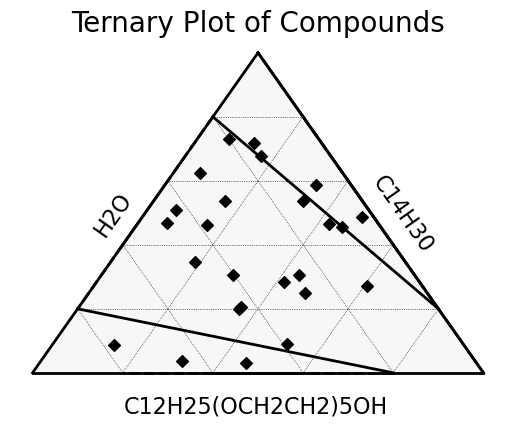

In [12]:
import ternary
import numpy as np
import matplotlib.pyplot as plt

# Function to create the ternary plot
def create_ternary_plot():
    figure, tax = ternary.figure(scale=100)

    # Set the labels for the compounds
    tax.set_title("Ternary Plot of Compounds", fontsize=20)
    tax.left_axis_label("H2O", fontsize=16)
    tax.right_axis_label("C14H30", fontsize=16)
    tax.bottom_axis_label("C12H25(OCH2CH2)5OH", fontsize=16)

    # Randomly generate data for the plot
    data = []
    for i in range(25):
        x, y, z = np.random.rand(3)
        total = x + y + z
        data.append((x/total*100, y/total*100, z/total*100))

    # Plot the data
    tax.scatter(data, marker='D', color='black')

    # Draw boundary and gridlines
    tax.boundary(linewidth=2.0)
    tax.gridlines(color="black", multiple=20)

    # Draw phase lines
    phase_lines = [(20, 80, 0), (40, 60, 0), (60, 40, 0), (80, 20, 0), 
                   (0, 80, 20), (0, 60, 40), (0, 40, 60), (0, 20, 80),
                   (80, 0, 20), (60, 0, 40), (40, 0, 60), (20, 0, 80)]
    for i in range(len(phase_lines) - 1):
        if i % 2 == 0:
            tax.line(phase_lines[i], phase_lines[i+1], linewidth=2.0, color='black', linestyle="--")
        else:
            tax.line(phase_lines[i], phase_lines[i+1], linewidth=2.0, color='black', linestyle="-")

    # Draw a curved line
    points = [(i, 100 - i, 0) for i in range(0, 101, 5)]
    tax.plot(points, linewidth=2.0, color='black')

    # Remove the x and y axes
    tax.get_axes().axis('off')

    # Show the plot
    plt.show()

# Call the function to create the plot
create_ternary_plot()


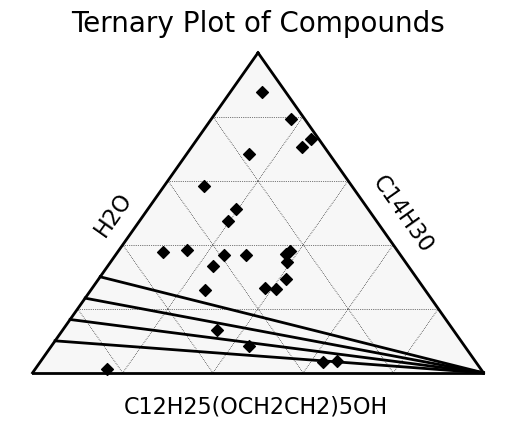

In [17]:
import ternary
import numpy as np
import matplotlib.pyplot as plt

# Function to create the ternary plot
def create_ternary_plot():
    figure, tax = ternary.figure(scale=100)

    # Set the labels for the compounds
    tax.set_title("Ternary Plot of Compounds", fontsize=20)
    tax.left_axis_label("H2O", fontsize=16)
    tax.right_axis_label("C14H30", fontsize=16)
    tax.bottom_axis_label("C12H25(OCH2CH2)5OH", fontsize=16)

    # Randomly generate data for the plot
    data = []
    for i in range(25):
        x, y, z = np.random.rand(3)
        total = x + y + z
        data.append((x/total*100, y/total*100, z/total*100))

    # Plot the data
    tax.scatter(data, marker='D', color='black')

    # Draw boundary and gridlines
    tax.boundary(linewidth=2.0)
    tax.gridlines(color="black", multiple=20)

    # Draw curved phase lines
    for i in np.linspace(10, 30, 4):
        points = [(j, i*(1 - j/100), 100 - i*(1 - j/100) - j) for j in np.linspace(0, 100, 100)]
        tax.plot(points, linewidth=2.0, color='black')

    # Remove the x and y axes
    tax.get_axes().axis('off')

    # Show the plot
    plt.show()

# Call the function to create the plot
create_ternary_plot()


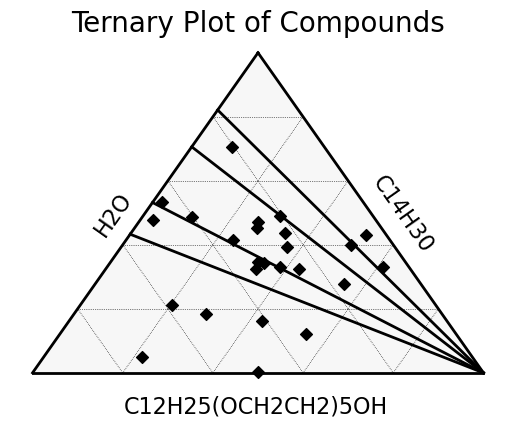

In [20]:
import ternary
import numpy as np
import matplotlib.pyplot as plt

# Function to create the ternary plot
def create_ternary_plot():
    figure, tax = ternary.figure(scale=100)

    # Set the labels for the compounds
    tax.set_title("Ternary Plot of Compounds", fontsize=20)
    tax.left_axis_label("H2O", fontsize=16)
    tax.right_axis_label("C14H30", fontsize=16)
    tax.bottom_axis_label("C12H25(OCH2CH2)5OH", fontsize=16)

    # Randomly generate data for the plot
    data = []
    for i in range(25):
        x, y, z = np.random.rand(3)
        total = x + y + z
        data.append((x/total*100, y/total*100, z/total*100))

    # Plot the data
    tax.scatter(data, marker='D', color='black')

    # Draw boundary and gridlines
    tax.boundary(linewidth=2.0)
    tax.gridlines(color="black", multiple=20)

    # Draw curved phase lines
    for _ in range(4):
        i = np.random.uniform(10, 90)
        points = [(j, i*(1 - j/100), 100 - i*(1 - j/100) - j) for j in np.linspace(0, 100, 100)]
        tax.plot(points, linewidth=2.0, color='black')

    # Remove the x and y axes
    tax.get_axes().axis('off')

    # Show the plot
    plt.show()

# Call the function to create the plot
create_ternary_plot()


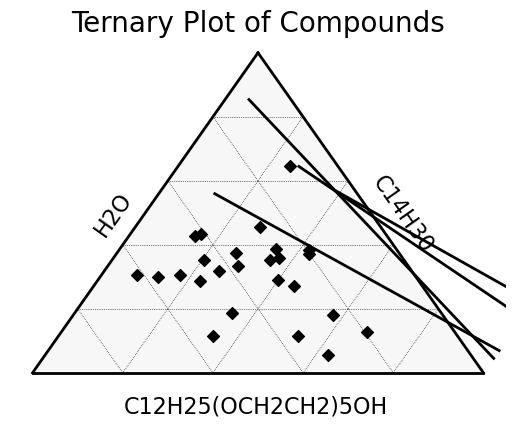

In [21]:
import ternary
import numpy as np
import matplotlib.pyplot as plt

# Function to create the ternary plot
def create_ternary_plot():
    figure, tax = ternary.figure(scale=100)

    # Set the labels for the compounds
    tax.set_title("Ternary Plot of Compounds", fontsize=20)
    tax.left_axis_label("H2O", fontsize=16)
    tax.right_axis_label("C14H30", fontsize=16)
    tax.bottom_axis_label("C12H25(OCH2CH2)5OH", fontsize=16)

    # Randomly generate data for the plot
    data = []
    for i in range(25):
        x, y, z = np.random.rand(3)
        total = x + y + z
        data.append((x/total*100, y/total*100, z/total*100))

    # Plot the data
    tax.scatter(data, marker='D', color='black')

    # Draw boundary and gridlines
    tax.boundary(linewidth=2.0)
    tax.gridlines(color="black", multiple=20)

    # Draw curved phase lines
    for _ in range(4):
        i = np.random.uniform(10, 90)
        start = np.random.uniform(0, 100 - i)
        points = [(j + start, i*(1 - j/100), 100 - i*(1 - j/100) - j - start) for j in np.linspace(0, 100 - start, 100)]
        tax.plot(points, linewidth=2.0, color='black')

    # Remove the x and y axes
    tax.get_axes().axis('off')

    # Show the plot
    plt.show()

# Call the function to create the plot
create_ternary_plot()


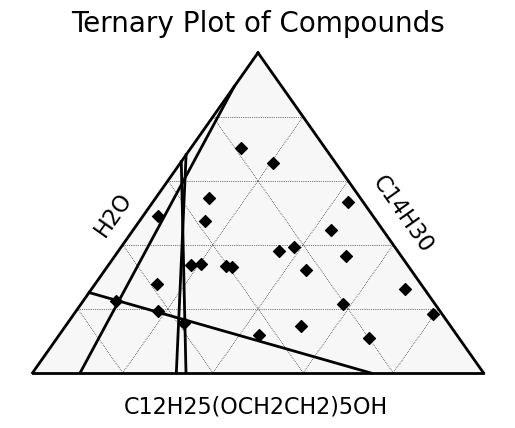

In [25]:
import ternary
import numpy as np
import matplotlib.pyplot as plt

# Function to create the ternary plot
def create_ternary_plot():
    figure, tax = ternary.figure(scale=100)

    # Set the labels for the compounds
    tax.set_title("Ternary Plot of Compounds", fontsize=20)
    tax.left_axis_label("H2O", fontsize=16)
    tax.right_axis_label("C14H30", fontsize=16)
    tax.bottom_axis_label("C12H25(OCH2CH2)5OH", fontsize=16)

    # Randomly generate data for the plot
    data = []
    for i in range(25):
        x, y, z = np.random.rand(3)
        total = x + y + z
        data.append((x/total*100, y/total*100, z/total*100))

    # Plot the data
    tax.scatter(data, marker='D', color='black')

    # Draw boundary and gridlines
    tax.boundary(linewidth=2.0)
    tax.gridlines(color="black", multiple=20)

    # Draw curved phase lines
    for _ in range(4):
        start = np.random.uniform(10, 90)
        end = 100 - start
        points = [(j, start*(1 - j/end), 100 - start*(1 - j/end) - j) for j in np.linspace(0, end, 100)]
        tax.plot(points, linewidth=2.0, color='black')

    # Remove the x and y axes
    tax.get_axes().axis('off')

    # Show the plot
    plt.show()

# Call the function to create the plot
create_ternary_plot()


# best result so far

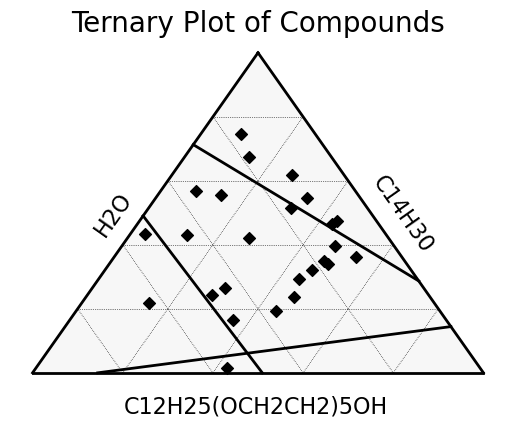

In [27]:
import ternary
import numpy as np
import matplotlib.pyplot as plt

# Function to create the ternary plot
def create_ternary_plot():
    figure, tax = ternary.figure(scale=100)

    # Set the labels for the compounds
    tax.set_title("Ternary Plot of Compounds", fontsize=20)
    tax.left_axis_label("H2O", fontsize=16)
    tax.right_axis_label("C14H30", fontsize=16)
    tax.bottom_axis_label("C12H25(OCH2CH2)5OH", fontsize=16)

    # Randomly generate data for the plot
    data = []
    for i in range(25):
        x, y, z = np.random.rand(3)
        total = x + y + z
        data.append((x/total*100, y/total*100, z/total*100))

    # Plot the data
    tax.scatter(data, marker='D', color='black')

    # Draw boundary and gridlines
    tax.boundary(linewidth=2.0)
    tax.gridlines(color="black", multiple=20)

    # Draw curved phase lines
    for edge in [(0, 100), (100, 0), (50, 50)]:
        start = np.random.uniform(10, 90)
        end = 100 - start
        if edge == (0, 100):
            points = [(j, start*(1 - j/end), 100 - start*(1 - j/end) - j) for j in np.linspace(0, end, 100)]
        elif edge == (100, 0):
            points = [(100 - start*(1 - j/end) - j, j, start*(1 - j/end)) for j in np.linspace(0, end, 100)]
        else:
            points = [(start*(1 - j/end), 100 - start*(1 - j/end) - j, j) for j in np.linspace(0, end, 100)]
        tax.plot(points, linewidth=2.0, color='black')

    # Remove the x and y axes
    tax.get_axes().axis('off')

    # Show the plot
    plt.show()

# Call the function to create the plot
create_ternary_plot()


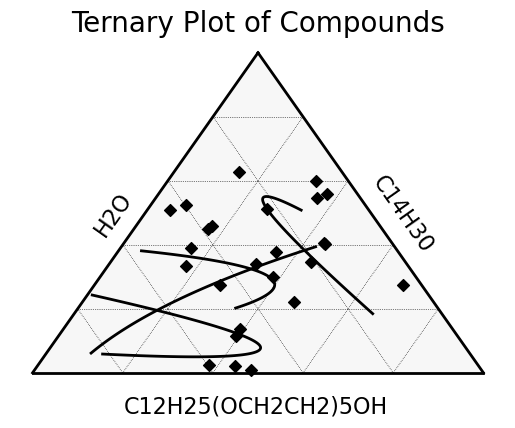

In [31]:
import ternary
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb

# Function to create a Bezier curve
def bezier_curve(points, n=100):
    N = len(points)
    t = np.linspace(0, 1, num=n)

    curve = np.zeros((n, 2))
    for i in range(N):
        curve += np.outer(comb(N - 1, i) * (1 - t) ** (N - 1 - i) * t ** i, points[i])

    return curve

# Function to create the ternary plot
def create_ternary_plot():
    figure, tax = ternary.figure(scale=100)

    # Set the labels for the compounds
    tax.set_title("Ternary Plot of Compounds", fontsize=20)
    tax.left_axis_label("H2O", fontsize=16)
    tax.right_axis_label("C14H30", fontsize=16)
    tax.bottom_axis_label("C12H25(OCH2CH2)5OH", fontsize=16)

    # Randomly generate data for the plot
    data = []
    for i in range(25):
        x, y, z = np.random.rand(3)
        total = x + y + z
        data.append((x/total*100, y/total*100, z/total*100))

    # Plot the data
    tax.scatter(data, marker='D', color='black')

    # Draw boundary and gridlines
    tax.boundary(linewidth=2.0)
    tax.gridlines(color="black", multiple=20)

    # Draw curved phase lines
    for _ in range(4):
        # Generate random control points for the Bezier curve
        control_points = np.random.rand(3, 2) * 100
        control_points[:, 1] = control_points[:, 1] * (100 - control_points[:, 0]) / 100

        # Generate the Bezier curve
        curve = bezier_curve(control_points)

        # Convert the curve points to ternary coordinates
        points = [(x, y, 100 - x - y) for x, y in curve if 100 - x - y >= 0]

        tax.plot(points, linewidth=2.0, color='black')

    # Remove the x and y axes
    tax.get_axes().axis('off')

    # Show the plot
    plt.show()a

# Call the function to create the plot
create_ternary_plot()


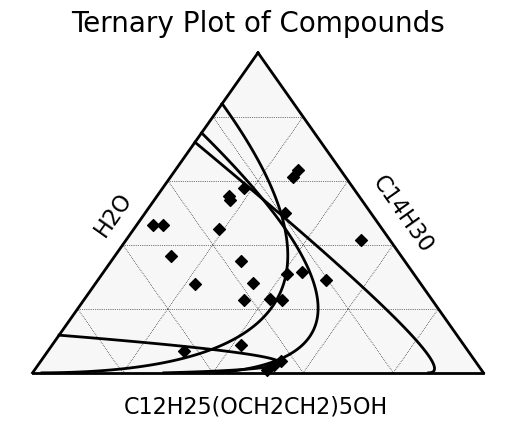

In [2]:
import ternary
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb

# Function to create a Bezier curve
def bezier_curve(points, n=100):
    N = len(points)
    t = np.linspace(0, 1, num=n)

    curve = np.zeros((n, 2))
    for i in range(N):
        curve += np.outer(comb(N - 1, i) * (1 - t) ** (N - 1 - i) * t ** i, points[i])

    return curve

# Function to create the ternary plot
def create_ternary_plot():
    figure, tax = ternary.figure(scale=100)

    # Set the labels for the compounds
    tax.set_title("Ternary Plot of Compounds", fontsize=20)
    tax.left_axis_label("H2O", fontsize=16)
    tax.right_axis_label("C14H30", fontsize=16)
    tax.bottom_axis_label("C12H25(OCH2CH2)5OH", fontsize=16)

    # Randomly generate data for the plot
    data = []
    for i in range(25):
        x, y, z = np.random.rand(3)
        total = x + y + z
        data.append((x/total*100, y/total*100, z/total*100))

    # Plot the data
    tax.scatter(data, marker='D', color='black')

    # Draw boundary and gridlines
    tax.boundary(linewidth=2.0)
    tax.gridlines(color="black", multiple=20)

    # Draw curved phase lines
    for _ in range(4):
        # Generate random control points for the Bezier curve
        control_points = np.random.rand(3, 2) * 100
        control_points[:, 1] = control_points[:, 1] * (100 - control_points[:, 0]) / 100

        # Ensure the first and last points are on the edges of the triangle
        control_points[0] = [0, np.random.rand() * 100]
        control_points[-1] = [100 - np.random.rand() * 100, 0]

        # Generate the Bezier curve
        curve = bezier_curve(control_points)

        # Convert the curve points to ternary coordinates
        points = [(x, y, 100 - x - y) for x, y in curve if 100 - x - y >= 0]

        tax.plot(points, linewidth=2.0, color='black')

    # Remove the x and y axes
    tax.get_axes().axis('off')

    # Show the plot
    plt.show()

# Call the function to create the plot
create_ternary_plot()


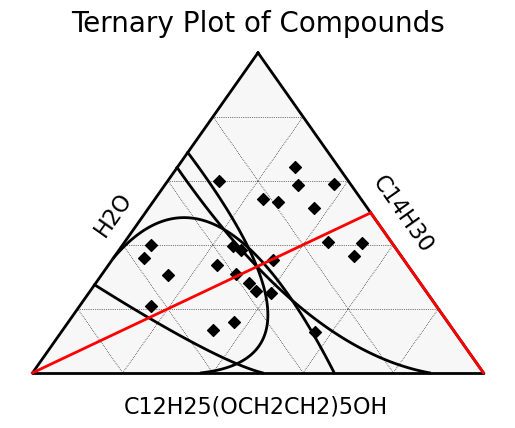

In [5]:
import ternary
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb

# Function to create a Bezier curve
def bezier_curve(points, n=100):
    N = len(points)
    t = np.linspace(0, 1, num=n)

    curve = np.zeros((n, 2))
    for i in range(N):
        curve += np.outer(comb(N - 1, i) * (1 - t) ** (N - 1 - i) * t ** i, points[i])

    return curve

# Function to create the ternary plot
def create_ternary_plot():
    figure, tax = ternary.figure(scale=100)

    # Set the labels for the compounds
    tax.set_title("Ternary Plot of Compounds", fontsize=20)
    tax.left_axis_label("H2O", fontsize=16)
    tax.right_axis_label("C14H30", fontsize=16)
    tax.bottom_axis_label("C12H25(OCH2CH2)5OH", fontsize=16)

    # Randomly generate data for the plot
    data = []
    for i in range(25):
        x, y, z = np.random.rand(3)
        total = x + y + z
        data.append((x/total*100, y/total*100, z/total*100))

    # Plot the data
    tax.scatter(data, marker='D', color='black')

    # Draw boundary and gridlines
    tax.boundary(linewidth=2.0)
    tax.gridlines(color="black", multiple=20)

    # Draw curved phase lines
    for _ in range(4):
        # Generate random control points for the Bezier curve
        control_points = np.random.rand(3, 2) * 100
        control_points[:, 1] = control_points[:, 1] * (100 - control_points[:, 0]) / 100

        # Ensure the first and last points are on the edges of the triangle
        control_points[0] = [0, np.random.rand() * 100]
        control_points[-1] = [100 - np.random.rand() * 100, 0]

        # Generate the Bezier curve
        curve = bezier_curve(control_points)

        # Convert the curve points to ternary coordinates
        points = [(x, y, 100 - x - y) for x, y in curve if 100 - x - y >= 0]

        tax.plot(points, linewidth=2.0, color='black')

    # Draw two lines that start at the bottom corners and meet in the middle
    middle_point = [50, 50, 0]
    tax.line(middle_point, [0, 0, 100], linewidth=2.0, color='red')
    tax.line(middle_point, [100, 0, 0], linewidth=2.0, color='red')

    # Remove the x and y axes
    tax.get_axes().axis('off')

    # Show the plot
    plt.show()

# Call the function to create the plot
create_ternary_plot()


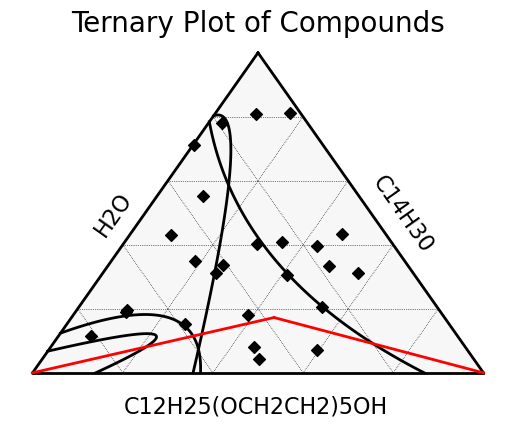

In [11]:
import ternary
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb

# Function to create a Bezier curve
def bezier_curve(points, n=100):
    N = len(points)
    t = np.linspace(0, 1, num=n)

    curve = np.zeros((n, 2))
    for i in range(N):
        curve += np.outer(comb(N - 1, i) * (1 - t) ** (N - 1 - i) * t ** i, points[i])

    return curve

# Function to create the ternary plot
def create_ternary_plot():
    figure, tax = ternary.figure(scale=100)

    # Set the labels for the compounds
    tax.set_title("Ternary Plot of Compounds", fontsize=20)
    tax.left_axis_label("H2O", fontsize=16)
    tax.right_axis_label("C14H30", fontsize=16)
    tax.bottom_axis_label("C12H25(OCH2CH2)5OH", fontsize=16)

    # Randomly generate data for the plot
    data = []
    for i in range(25):
        x, y, z = np.random.rand(3)
        total = x + y + z
        data.append((x/total*100, y/total*100, z/total*100))

    # Plot the data
    tax.scatter(data, marker='D', color='black')

    # Draw boundary and gridlines
    tax.boundary(linewidth=2.0)
    tax.gridlines(color="black", multiple=20)

    # Draw curved phase lines
    for _ in range(4):
        # Generate random control points for the Bezier curve
        control_points = np.random.rand(3, 2) * 100
        control_points[:, 1] = control_points[:, 1] * (100 - control_points[:, 0]) / 100

        # Ensure the first and last points are on the edges of the triangle
        control_points[0] = [0, np.random.rand() * 100]
        control_points[-1] = [100 - np.random.rand() * 100, 0]

        # Generate the Bezier curve
        curve = bezier_curve(control_points)

        # Convert the curve points to ternary coordinates
        points = [(x, y, 100 - x - y) for x, y in curve if 100 - x - y >= 0]

        tax.plot(points, linewidth=2.0, color='black')

    # Draw two lines that start at the bottom corners and meet at a random point in the middle
    middle_point = [np.random.rand()*100, np.random.rand()*100, 0]
    middle_point[1] = middle_point[1] * (100 - middle_point[0]) / 100  # Ensure the point is within the triangle
    tax.line(middle_point, [0, 0, 100], linewidth=2.0, color='red')
    tax.line(middle_point, [100, 0, 0], linewidth=2.0, color='red')

    # Remove the x and y axes
    tax.get_axes().axis('off')

    # Show the plots
    plt.show()

# Call the function to create the plot
create_ternary_plot()


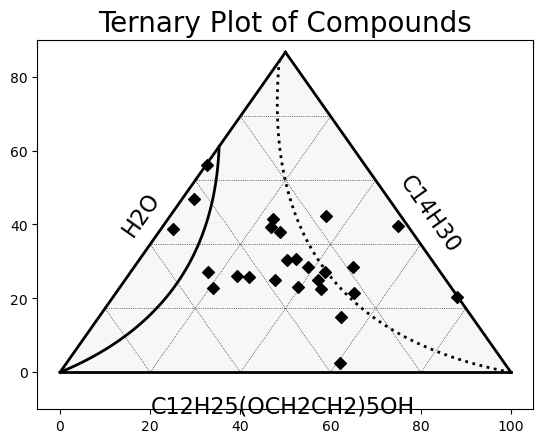

In [46]:
import ternary
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb

# Function to create a Bezier curve
def bezier_curve(points, n=100):
    N = len(points)
    t = np.linspace(0, 1, num=n)

    curve = np.zeros((n, 2))
    for i in range(N):
        curve += np.outer(comb(N - 1, i) * (1 - t) ** (N - 1 - i) * t ** i, points[i])

    return curve

# Function to create the ternary plot
def create_ternary_plot():
    figure, tax = ternary.figure(scale=100)

    # Set the labels for the compounds
    tax.set_title("Ternary Plot of Compounds", fontsize=20)
    tax.left_axis_label("H2O", fontsize=16)
    tax.right_axis_label("C14H30", fontsize=16)
    tax.bottom_axis_label("C12H25(OCH2CH2)5OH", fontsize=16)

    # Randomly generate data for the plot
    data = []
    for i in range(25):
        x, y, z = np.random.rand(3)
        total = x + y + z
        data.append((x/total*100, y/total*100, z/total*100))

    # Plot the data
    tax.scatter(data, marker='D', color='black')

    # Draw boundary and gridlines
    tax.boundary(linewidth=2.0)
    tax.gridlines(color="black", multiple=20)

    # Draw curved phase lines
    num_curves = np.random.randint(2, 5)  # Random number of curves between 2 and 4
    for _ in range(num_curves):
        # Generate random control points for the Bezier curve
        control_points = np.random.rand(3, 2) * 100
        control_points[:, 1] = control_points[:, 1] * (100 - control_points[:, 0]) / 100

        # Ensure the first point is on the bottom left or right corner of the triangle
        if np.random.rand() < 0.5:
            control_points[0] = [0, 0]  # Bottom left corner
        else:
            control_points[0] = [100, 0]  # Bottom right corner

        # Ensure the last point is on a random edge of the triangle
        if np.random.rand() < 0.5:
            control_points[-1] = [np.random.rand() * 100, 0]  # Bottom edge
        else:
            control_points[-1] = [0, np.random.rand() * 100]  # Left edge

        # Generate the Bezier curve
        curve = bezier_curve(control_points)

        # Convert the curve points to ternary coordinates
        points = [(x, y, 100 - x - y) for x, y in curve if 100 - x - y >= 0]

        # Plot the curve with a solid or dotted line
        if np.random.rand() < 0.5:
            tax.plot(points, linewidth=2.0, color='black')  # Solid line
        else:
            tax.plot(points, linewidth=2.0, color='black', linestyle=':')  # Dotted line

    # Show the plot
    plt.show()

# Call the function to create the plot
create_ternary_plot()


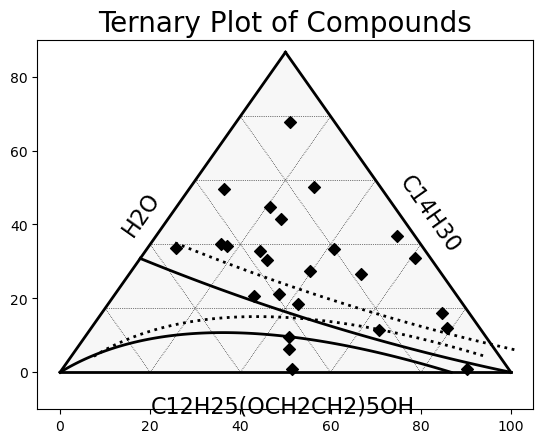

In [51]:
import ternary
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb

# Function to create a Bezier curve
def bezier_curve(points, n=100):
    N = len(points)
    t = np.linspace(0, 1, num=n)

    curve = np.zeros((n, 2))
    for i in range(N):
        curve += np.outer(comb(N - 1, i) * (1 - t) ** (N - 1 - i) * t ** i, points[i])

    return curve

# Function to offset points
def offset_points(points, offset=1):
    return [(x+offset, y+offset, z) for x, y, z in points if z-offset>=0 and y+offset<=100 and x+offset<=100]

# Function to create the ternary plot
def create_ternary_plot():
    figure, tax = ternary.figure(scale=100)

    # Set the labels for the compounds
    tax.set_title("Ternary Plot of Compounds", fontsize=20)
    tax.left_axis_label("H2O", fontsize=16)
    tax.right_axis_label("C14H30", fontsize=16)
    tax.bottom_axis_label("C12H25(OCH2CH2)5OH", fontsize=16)

    # Randomly generate data for the plot
    data = []
    for i in range(25):
        x, y, z = np.random.rand(3)
        total = x + y + z
        data.append((x/total*100, y/total*100, z/total*100))

    # Plot the data
    tax.scatter(data, marker='D', color='black')

    # Draw boundary and gridlines
    tax.boundary(linewidth=2.0)
    tax.gridlines(color="black", multiple=20)

    # Draw curved phase lines
    num_curves = 2
    for _ in range(num_curves):
        # Generate random control points for the Bezier curve
        control_points = np.random.rand(3, 2) * 100
        control_points[:, 1] = control_points[:, 1] * (100 - control_points[:, 0]) / 100

        # Ensure the first point is on the bottom left or right corner of the triangle
        if np.random.rand() < 0.5:
            control_points[0] = [0, 0]  # Bottom left corner
        else:
            control_points[0] = [100, 0]  # Bottom right corner

        # Ensure the last point is on a random edge of the triangle
        if np.random.rand() < 0.5:
            control_points[-1] = [np.random.rand() * 100, 0]  # Bottom edge
        else:
            control_points[-1] = [0, np.random.rand() * 100]  # Left edge

        # Generate the Bezier curve
        curve = bezier_curve(control_points)

        # Convert the curve points to ternary coordinates
        points = [(x, y, 100 - x - y) for x, y in curve if 100 - x - y >= 0]

        # Plot the solid line
        tax.plot(points, linewidth=2.0, color='black')  # Solid line
        
        # Offset points
        offset_pts = offset_points(points, offset=5)
        
        # Plot the offset dotted line
        tax.plot(offset_pts, linewidth=2.0, color='black', linestyle=':')  # Dotted line

    # Show the plot
    plt.show()

# Call the function to create the plot
create_ternary_plot()


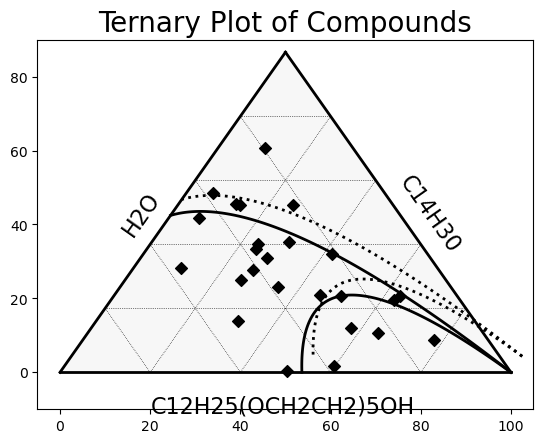

In [58]:
import ternary
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb

# Function to create a Bezier curve
def bezier_curve(points, n=100):
    N = len(points)
    t = np.linspace(0, 1, num=n)

    curve = np.zeros((n, 2))
    for i in range(N):
        curve += np.outer(comb(N - 1, i) * (1 - t) ** (N - 1 - i) * t ** i, points[i])

    return curve

# Function to offset points
def offset_points(points, offset=1):
    return [(x, y+offset, z) for x, y, z in points if z+offset<=100 and y+offset<=100 and x<=100]

# Function to create the ternary plot
def create_ternary_plot():
    figure, tax = ternary.figure(scale=100)

    # Set the labels for the compounds
    tax.set_title("Ternary Plot of Compounds", fontsize=20)
    tax.left_axis_label("H2O", fontsize=16)
    tax.right_axis_label("C14H30", fontsize=16)
    tax.bottom_axis_label("C12H25(OCH2CH2)5OH", fontsize=16)

    # Randomly generate data for the plot
    data = []
    for i in range(25):
        x, y, z = np.random.rand(3)
        total = x + y + z
        data.append((x/total*100, y/total*100, z/total*100))

    # Plot the data
    tax.scatter(data, marker='D', color='black')

    # Draw boundary and gridlines
    tax.boundary(linewidth=2.0)
    tax.gridlines(color="black", multiple=20)

    # Draw curved phase lines
    num_curves = 2
    for _ in range(num_curves):
        # Generate random control points for the Bezier curve
        control_points = np.random.rand(3, 2) * 100
        control_points[:, 1] = control_points[:, 1] * (100 - control_points[:, 0]) / 100

        # Ensure the first point is on the bottom left or right corner of the triangle
        if np.random.rand() < 0.5:
            control_points[0] = [0, 0]  # Bottom left corner
        else:
            control_points[0] = [100, 0]  # Bottom right corner

        # Ensure the last point is on a random edge of the triangle
        if np.random.rand() < 0.5:
            control_points[-1] = [np.random.rand() * 100, 0]  # Bottom edge
        else:
            control_points[-1] = [0, np.random.rand() * 100]  # Left edge

        # Generate the Bezier curve
        curve = bezier_curve(control_points)

        # Convert the curve points to ternary coordinates
        points = [(x, y, 100 - x - y) for x, y in curve if 100 - x - y >= 0]

        # Plot the solid line
        tax.plot(points, linewidth=2.0, color='black')  # Solid line
        
        # Function to offset points
        def offset_points(points, offset=1):
        return [(x, y, max(0, z - offset)) for x, y, z in points]
        
        # Plot the offset dotted line
        tax.plot(offset_pts, linewidth=2.0, color='black', linestyle=':')  # Dotted line

    # Show the plot
    plt.show()

# Call the function to create the plot
create_ternary_plot()
